In [100]:
import scipy.io as sio
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [55]:
mat = sio.loadmat('annthyroid.mat')
X, y = mat['X'], mat['y'].reshape((7200,))

# Problem 1  

### part (a)

Univariate joint visualization


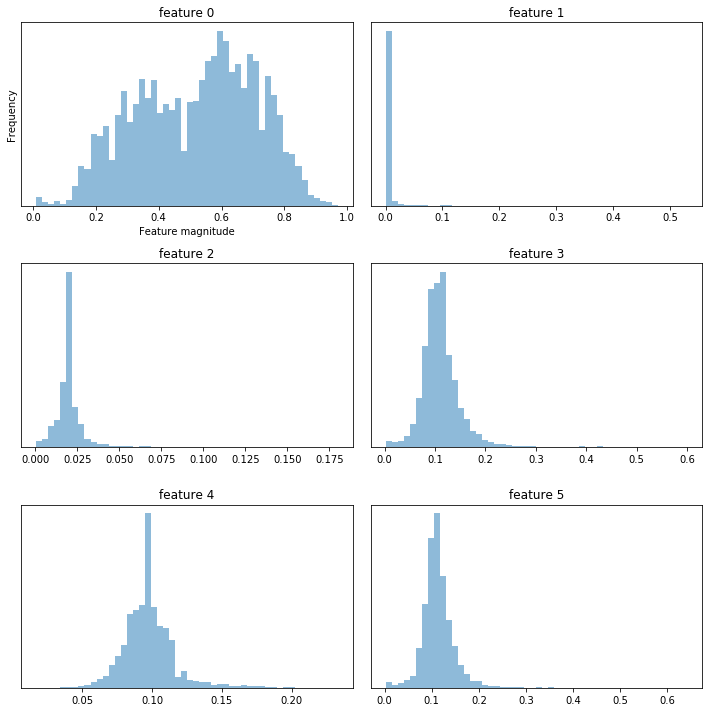

In [78]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
ax = axes.ravel()
for i in range(6):
    _, bins = np.histogram(X[:, i], bins=50)
    ax[i].hist(X[:, i], bins=bins, alpha=.5)
    ax[i].set_title('feature {}'.format(i))
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    fig.tight_layout()

print("Univariate joint visualization")

Univariate Joint Visualization


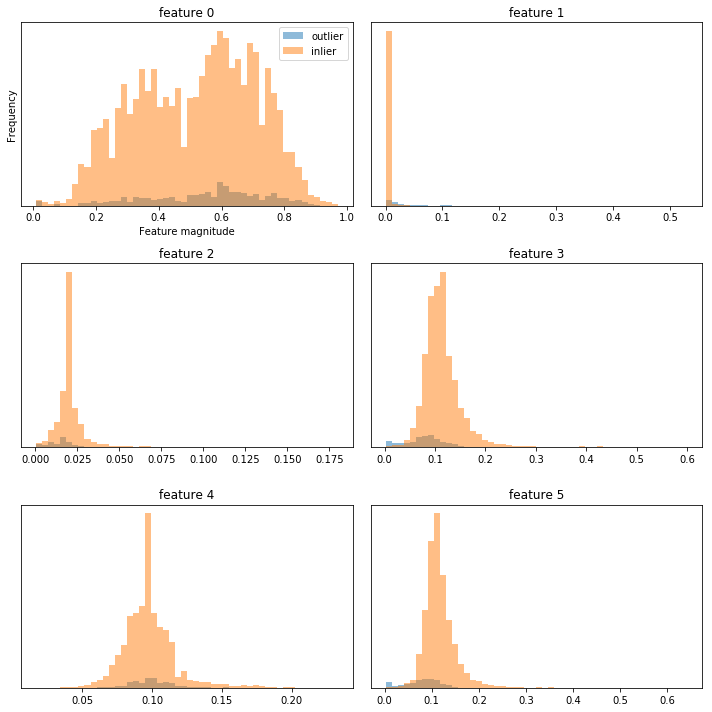

In [79]:
print("Univariate Joint Visualization")

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
outlier = X[y == 1]
inlier = X[y == 0]
ax = axes.ravel()
for i in range(6):
    _, bins = np.histogram(X[:, i], bins=50)
    ax[i].hist(outlier[:, i], bins=bins, alpha=.5)
    ax[i].hist(inlier[:, i], bins=bins, alpha=.5)
    ax[i].set_title('feature {}'.format(i))
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["outlier", "inlier"], loc="best")
    fig.tight_layout()

### PCA Visualization

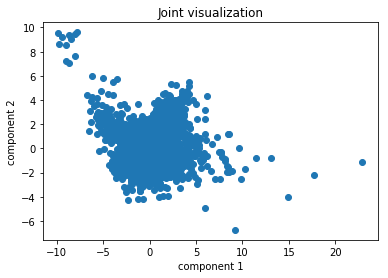

In [118]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
pca = PCA().fit(X_scaled)
X_scaled_pca = pca.transform(X_scaled)

ax = plt.subplot()
ax.scatter(X_scaled_pca[:,0], X_scaled_pca[:,1])
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
ax.set_title("Joint visualization")
plt.show()

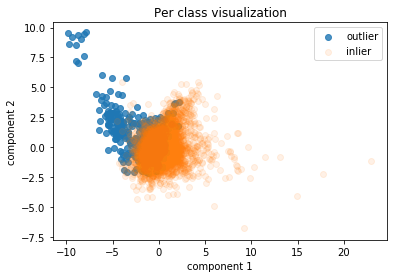

In [119]:
inlier_pca = X_scaled_pca[y==0]
outlier_pca = X_scaled_pca[y==1]

ax = plt.subplot()
ax.scatter(outlier_pca[:,0], outlier_pca[:,1], alpha=.8)
ax.scatter(inlier_pca[:,0], inlier_pca[:,1], alpha=.1)
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
ax.legend(["outlier", "inlier"], loc="best")
ax.set_title("Per class visualization")
plt.show()

Note that the alpha value for inlier is 0.1 while it is 0.8 for the outlier. This was done so we could see that inlier and outlier dots overlap over a large area.

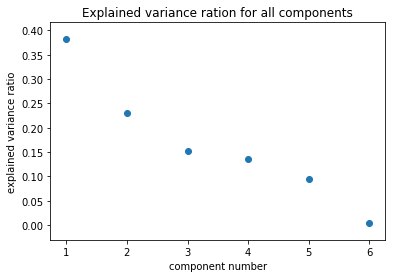

In [129]:
ax = plt.subplot()
ax.scatter(range(1,7), pca.explained_variance_ratio_)
ax.set_xlabel('component number')
ax.set_ylabel('explained variance ratio')
ax.set_title('Explained variance ration for all components');

The sixth component explains less than half percent of the variance and therefore should not be included. The 5th component explains almost 10% of the variance, enough to secure its spot on the list. Thus, the components 5 and below should be included in the model. 

### Part (b)

In [104]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=6).fit(X_scaled)
X_pca = pca.transform(X_scaled)


In [107]:
pca.explained_variance_ratio_

array([0.38261537, 0.2307925 , 0.1518097 , 0.13539672, 0.09538214,
       0.00400357])

In [113]:
for i in range(0,6):
    print(stats.describe(X[:,i]))

DescribeResult(nobs=7200, minmax=(0.01, 0.97), mean=0.5205181527777778, variance=0.035822892451372684, skewness=-0.21252805922345863, kurtosis=-0.8764616707190691)
DescribeResult(nobs=7200, minmax=(0.0, 0.53), mean=0.004861402777777778, variance=0.0005280478113949082, skewness=14.522537791735905, kurtosis=261.765008299574)
DescribeResult(nobs=7200, minmax=(0.0005, 0.18), mean=0.01997677777777778, variance=5.683901059097714e-05, skewness=3.4869534084491587, kurtosis=45.828019136903556)
DescribeResult(nobs=7200, minmax=(0.002, 0.6), mean=0.10943013194444445, variance=0.0012937371980795461, skewness=1.5159346376601932, kurtosis=11.12379142598042)
DescribeResult(nobs=7200, minmax=(0.017, 0.233), mean=0.09783791666666666, variance=0.00036421917610084733, skewness=1.247685799959633, kurtosis=4.891185267291592)
DescribeResult(nobs=7200, minmax=(0.002, 0.642), mean=0.11321468472222224, variance=0.0013030348305437308, skewness=2.3842400270327495, kurtosis=22.66670249620041)
